## Project 1：TF-IDF + Visualization
金庸小說字頻分析

載入所需的資源

In [89]:

import jieba
import sys
import scipy
import sklearn
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
myfont = fm.FontProperties(fname='C:/Windows/Fonts/msyh.ttc')
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


讀取金庸小說txt  並以jieba套件切分詞彙

In [59]:
text_list = []
word_list = []
books=[r'1.txt',r'2.txt',r'3.txt',r'4.txt',r'5.txt',r'6.txt',r'7.txt',r'8.txt',r'9.txt',r'10.txt',r'11.txt',r'12.txt',r'13.txt',r'14.txt',r'15.txt']
booknames=[u"飛狐外傳",u" 書劍恩仇錄",u"天龍八部",u"白馬嘯西風",u"俠客行",u"連城訣",u"倚天屠龍記", u"射鵰英雄傳", u"神鵰俠侶", u"笑傲江湖", u"鴛鴦刀", u"雪山飛狐", u"鹿鼎記",u"越女劍", u"碧血劍"]
for filename in books:
    with open(filename,'r') as file:
        text = "".join(file.readlines()[1:])
    word_list.append(" ".join(jieba.cut(text.split(',')[0], cut_all=False))) 
    text_list.append(text)
    

In [14]:
len(text_list)

4

用TfidfVectorizer()算出tfidf

In [163]:
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(word_list)
result=[]
print tfidf.shape

words = vectorizer.get_feature_names()

for i in xrange(len(text_list)):
    score = np.asarray(tfidf[i,].mean(axis=0)).ravel().tolist()
    tfidf_df = pd.DataFrame({'Term': vectorizer.get_feature_names(), 'TF-IDF': score})
    tfidf_df = tfidf_df.sort_values(by='TF-IDF', ascending=False)
    tfidf_df = tfidf_df.reset_index(drop=True).head(1000)
    result.append(tfidf_df)





(15, 159011)


印出其中五本書 TFIDF>0.1的詞彙
<br> 可以注意到主要是人名 因為大部分小說有不同的角色群

In [70]:
for i in range(5):
    print('------------' + booknames[i] + '------------')
    print(result[i][result[i]['TF-IDF']>0.1])

------------飛狐外傳------------
      TF-IDF Term
0   0.663052   胡斐
1   0.317245  程灵素
2   0.176638  袁紫衣
3   0.172683  苗人凤
4   0.153832  马春花
5   0.125494  凤天南
6   0.119956  福康安
7   0.117759  赵半山
8   0.116880  胡斐道
9   0.114862   说道
10  0.109302   徐铮
11  0.102045   一个
12  0.101205  商宝震
------------ 書劍恩仇錄------------
      TF-IDF  Term
0   0.615105   陈家洛
1   0.242859   张召重
2   0.220591   徐天宏
3   0.211545   霍青桐
4   0.195540   余鱼同
5   0.195192   文泰来
6   0.168053   李沅芷
7   0.160050   陆菲青
8   0.152664   周仲英
9   0.132866    乾隆
10  0.128736    骆冰
11  0.123517  香香公主
12  0.101034    甚么
------------天龍八部------------
      TF-IDF Term
0   0.431002   段誉
1   0.336140   虚竹
2   0.282065   萧峰
3   0.186515  王语嫣
4   0.178954  慕容复
5   0.165539   乔峰
6   0.161769  段正淳
7   0.157645  木婉清
8   0.150006   说道
9   0.120983  鸠摩智
10  0.117267   自己
11  0.116400  游坦之
12  0.107922   阿朱
13  0.106695   什么
14  0.102906   一个
------------白馬嘯西風------------
     TF-IDF Term
0  0.723491  李文秀
1  0.305146   苏普
2  0.267413   阿曼
3  0.24

其中五本書 TFIDF排序與對應值
<br> 其變動趨勢可能與小說中的戲分對映相關 著重某一角色的小說 其TFIDF可能特別高
<br> 如天龍八部折線較平緩 也許比較偏群像劇

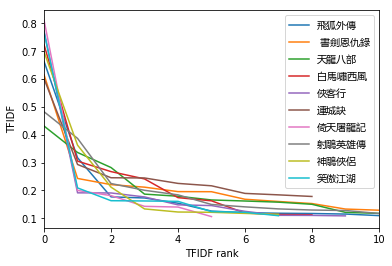

In [93]:
zhfont1 = matplotlib.font_manager.FontProperties(fname=r"C:\\Windows\\Fonts\\msjh.ttc")
booknames=[u"飛狐外傳",u" 書劍恩仇錄",u"天龍八部",u"白馬嘯西風",u"俠客行",u"連城訣",u"倚天屠龍記", u"射鵰英雄傳", u"神鵰俠侶", u"笑傲江湖", u"鴛鴦刀", u"雪山飛狐", u"鹿鼎記",u"越女劍", u"碧血劍"]
for i in range(10):
    plt.plot(result[i][result[i]['TF-IDF']>0.1].index, result[i][result[i]['TF-IDF']>0.1]['TF-IDF'])

plt.xlim((0,10))
plt.legend(booknames,prop=myfont)
plt.xlabel('TFIDF rank')
plt.ylabel('TFIDF')

比較飛狐外傳與其他金庸小說的餘弦相似性
其中以劇情相關聯的雪山飛狐相似性明顯高出一截

In [98]:
print "餘弦相似性\n ", cosine_similarity(tfidf[0], tfidf)

餘弦相似性
  [[ 1.          0.15152561  0.19702935  0.09567406  0.12952073  0.12594741
   0.12188881  0.17299023  0.1475356   0.12819357  0.14609619  0.35270054
   0.09522431  0.06536329  0.10842622]]


([<matplotlib.axis.XTick at 0x1ecab670>,
 <a list of 14 Text xticklabel objects>)

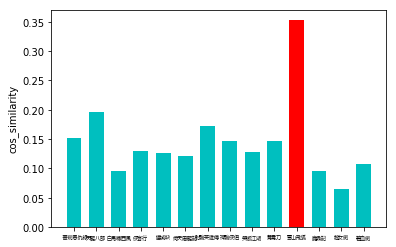

In [121]:
cos_sim=cosine_similarity(tfidf[0], tfidf)
width = 1/1.5
plt.bar(range(14), cos_sim[0][1:], width, color=['c','c','c','c','c','c','c','c','c','c','r','c','c','c'])

plt.ylabel('cos_similarity')
plt.xticks(range(14), booknames[1:],fontproperties=myfont,fontsize=5)

基於TF-IDF分數的文字雲
<br> 使用wordcloud繪圖 呈現飛狐外傳與雪山飛狐的關鍵字

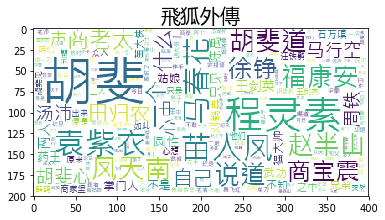

In [186]:
from wordcloud import WordCloud
font=r"C:\\Windows\\Fonts\\msjh.ttc"

dic={}
for i in range(1000):
    dic[result[0]['Term'][i]]=int(result[0]['TF-IDF'][i])

wordcloud2 = WordCloud(background_color="white",font_path=font)
wordcloud2.fit_words(dic)
plt.title(u'飛狐外傳',fontproperties=myfont,fontsize=20)
plt.imshow(wordcloud2)

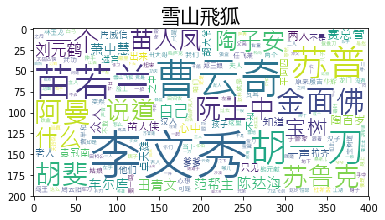

In [190]:
dic={}
for i in range(1000):
    dic[result[11]['Term'][i]]=int(result[11]['TF-IDF'][i]*200)

wordcloud2 = WordCloud(background_color="white",font_path=font)
wordcloud2.fit_words(dic)
plt.title(u'雪山飛狐',fontproperties=myfont,fontsize=20)
plt.imshow(wordcloud2)

array([[ 0.10842622,  0.11293972,  0.13663122,  0.0674197 ,  0.07989852,
         0.10524982,  0.0924925 ,  0.13796685,  0.10897057,  0.10752064,
         0.08892027,  0.13969978,  0.07465847,  0.04565084,  1.        ]])